<a href="https://colab.research.google.com/github/f07735t37/python-and-ML-course/blob/main/Python_course_extra_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Model

To predict the saltiness of water based on water temperature

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # importing a Machine Learning model

In [2]:
water_data = pd.read_csv("bottle.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
water_data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

In [24]:
water_data["T_degC"] # target column

0         10.500
1         10.460
2         10.460
3         10.450
4         10.450
           ...  
864858    18.744
864859    18.744
864860    18.692
864861    18.161
864862    17.533
Name: T_degC, Length: 864863, dtype: float64

In [25]:
water_data["Salnty"] # target column

0         33.4400
1         33.4400
2         33.4370
3         33.4200
4         33.4210
           ...   
864858    33.4083
864859    33.4083
864860    33.4150
864861    33.4062
864862    33.3880
Name: Salnty, Length: 864863, dtype: float64

# Pre-processing

Check and change NaN values

In [6]:
water_data["T_degC"].isna().sum()

10963

In [7]:
water_data["Salnty"].isna().sum()

47354

In [8]:
water_data["T_degC"].fillna(water_data["T_degC"].median(), inplace = True) # Replace NaN values with median

In [9]:
water_data["T_degC"].isna().sum()

0

In [10]:
water_data["Salnty"].fillna(water_data["Salnty"].mean(), inplace = True) # Replace NaN values with mean

In [11]:
water_data["Salnty"].isna().sum()

0

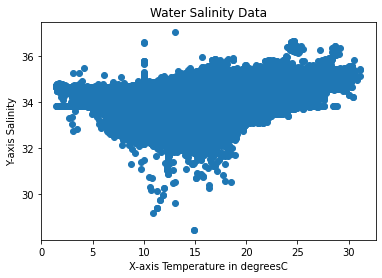

In [12]:
# what I'm trying to predict should be on the y axis
plt.scatter(water_data["T_degC"], water_data["Salnty"])
plt.title("Water Salinity Data")
plt.xlabel("X-axis Temperature in degreesC")
plt.ylabel("Y-axis Salinity")
plt.show()

In [13]:
x = water_data["T_degC"].values.reshape(-1, 1)
y = water_data["Salnty"].values.reshape(-1, 1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [15]:
ml_model = LinearRegression().fit(x_train, y_train)

In [26]:
print("Training set score: ", ml_model.score(x_train, y_train)*100, "%") # ML model (machine learning model) prediction (generalisation) score based on training set

Training set score:  23.856877026685595 %


In [27]:
print("Test set score: ", ml_model.score(x_test, y_test)*100, "%") # ML model prediction score based on the test set. Generalising quite well

Test set score:  24.278232838669346 %


In [31]:
y_prediction = ml_model.predict(x_test) # ML model predictions for salinity in test set
print(y_prediction)

[[33.4451129 ]
 [34.04488077]
 [33.55184243]
 ...
 [33.4924904 ]
 [33.81007582]
 [33.78872991]]


In [30]:
y_test # actual salinity values in test set

array([[33.236],
       [34.44 ],
       [33.4  ],
       ...,
       [33.107],
       [33.365],
       [34.68 ]])

# Final results

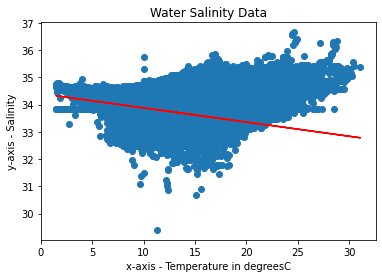

In [33]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, color="r")
plt.title("Water Salinity Data")
plt.xlabel("x-axis - Temperature in degreesC")
plt.ylabel("y-axis - Salinity")
plt.show()